### Testing multiRISE

In [1]:
# Add locations of modules
push!(LOAD_PATH, "../src/")

4-element Array{String,1}:
 "@"      
 "@v#.#"  
 "@stdlib"
 "../src/"

In [2]:
using GML_Glauber_Dynamics
using LightGraphs
#using Cairo
#using Junet
#using LaTeXStrings

#include("beta_scaling.jl")

#### Simple Testcase

In [3]:
model = FactorGraph([0.0 0.9 0.1; 0.9 0.0 0.1; 0.1 0.1 0.0])

n_samples = 100000

samples_T, samples_mixed_T = gibbs_sampling(model, n_samples, T_regime())

┌ Info: assuming spin alphabet
└ @ GML_Glauber_Dynamics /Users/gogol/Dropbox (Personal)/Research/LANL/Code/GML_Glauber_Dynamics.jl/src/models.jl:108
┌ Info: using Glauber dynamics v1 to generate T-regime samples
└ @ GML_Glauber_Dynamics /Users/gogol/Dropbox (Personal)/Research/LANL/Code/GML_Glauber_Dynamics.jl/src/sampling.jl:328


([3391 3 … -1 1; 5234 3 … 1 1; … ; 138 1 … 1 1; 156 2 … -1 1], [25929 -1 -1 -1; 17033 -1 -1 1; … ; 3424 -1 1 1; 3549 1 -1 -1])

In [4]:
learned_gm_RISE = learn_glauber_dynamics(samples_T, RISE())
learned_gm_multiRISE = learn(samples_mixed_T, multiRISE(0.4, true, 3))

┌ Warning: `with_optimizer` is deprecated. Adapt the following example to update your code:
│ `with_optimizer(Ipopt.Optimizer, max_cpu_time=60.0)` becomes `optimizer_with_attributes(Ipopt.Optimizer, "max_cpu_time" => 60.0)`.
│   caller = ip:0x0
└ @ Core :-1
┌ Info: using JuMP for RISE to learn Glauber dynamics
└ @ GML_Glauber_Dynamics /Users/gogol/Dropbox (Personal)/Research/LANL/Code/GML_Glauber_Dynamics.jl/src/GML_Glauber_Dynamics.jl:370



******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

  (1,) => 0.009747938455754362
  (2,) => -0.008152316314908514
  (3,) => -0.002871808984381792
  (1, 2) => 0.8946977724955967
  (1, 3) => 0.10139051084221504
  (2, 3) => 0.09984914055230201
  

alphabet: spin
vars: 3
terms: 7


(1, 2, 3) => -1.1496229918313846e-10


In [5]:
err = abs.(convert(Array{Float64,2}, model) - learned_gm_RISE)

3×3 Array{Float64,2}:
 0.00501096  0.00687002  0.00454456
 0.00687002  0.0115013   0.00101906
 0.00454456  0.00101906  0.00318872

In [7]:
display(learned_gm_RISE)

3×3 Array{Float64,2}:
 0.00726479  0.893378     0.093071  
 0.893378    0.00392335   0.100196  
 0.093071    0.100196    -0.00251901

In [8]:
display(learned_gm_multiRISE)

alphabet: spin
vars: 3
terms: 7


  (1,) => -0.00938635018755445
  (2,) => -0.0026349885190796204
  (3,) => -0.00905271990683063
  (1, 2) => 0.8946357693699625
  (1, 3) => 0.09130485486514876
  (2, 3) => 0.09707767082961076
  (1, 2, 3) => 7.460193748815757e-11


In [13]:
learned_gm_multiRISE4 = learn(samples_mixed_T, multiRISE(0.4, true, 5))

alphabet: spin
vars: 3
terms: 7


  (1,) => -0.005615601159019212
  (2,) => -0.0016703469040866559
  (3,) => -0.016355837895662258
  (1, 2) => 0.9014966469041946
  (1, 3) => 0.10354008322553893
  (2, 3) => 0.09593418142549995
  (1, 2, 3) => -0.00030060086607083456


#### p=16 system

In [21]:
N = 32
d = 3
α = 0.4
β = 1.2

1.2

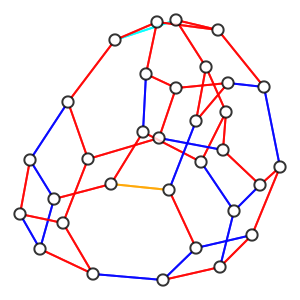

In [22]:
adj_matrix, struct_adj_matrix = spin_glass_random_regular_model(N,d,α,β)
gm = Junet.Graph(struct_adj_matrix,directed=false)

plot(gm, size=(300,300), layout=layout_fruchterman_reingold(gm), node_color="white", node_border_color="black",
    node_border_width=2, edge_color=[edge_color_gm(i, adj_matrix, α, β) for i = 1:edgecount(gm)],
    edge_width=2)

In [24]:
model = FactorGraph(adj_matrix)
n_samples = 100000
samples_T, samples_mixed_T = gibbs_sampling2(model, n_samples, T_regime())
display("done")

INFO: assuming spin alphabet
INFO: using Glauber dynamics v2 to generate T-regime samples


"done"

1130286244


In [25]:
learned_gm_RISE = learn_glauber_dynamics(samples_T, RISE())

INFO: using JuMP for RISE to learn Glauber dynamics


32×32 Array{Float64,2}:
  0.00136916   -0.0537706    -0.357055     …   0.0104088    -0.0790345  
 -0.0537706    -0.0600668     0.0101477        0.205075     -2.10403e-11
 -0.357055      0.0101477     0.183613        -8.56836e-12  -0.00827513 
  0.0268569    -0.0358802    -0.0143672       -0.00393973   -0.0652647  
  3.54707e-11  -0.100019      0.0620258       -0.0231027     4.68941e-10
 -0.0110622     1.5963e-11    1.09902      …  -0.119095      0.0849312  
 -0.0586119     0.0314049    -0.0768759        0.0269803    -0.00538571 
  0.0670522     0.0868267    -2.64309e-11     -0.0153217     0.137859   
 -0.0480843     1.7083e-10   -0.137612         0.124088      1.01329    
 -0.00990684    0.0774124    -7.15855e-12      0.0511696    -0.0734894  
  0.00926292   -0.0490145     0.0291791    …  -1.113         7.23822e-11
  0.0269984    -0.00588292    1.64417e-11      1.19626       0.114663   
  0.0582716     1.51531e-11   2.27066e-10     -4.56745e-11   2.99775e-10
  ⋮                        

In [ ]:
learned_gm_multiRISE = learn(samples_mixed_T, multiRISE(0.4, true, 3))